60000
10000


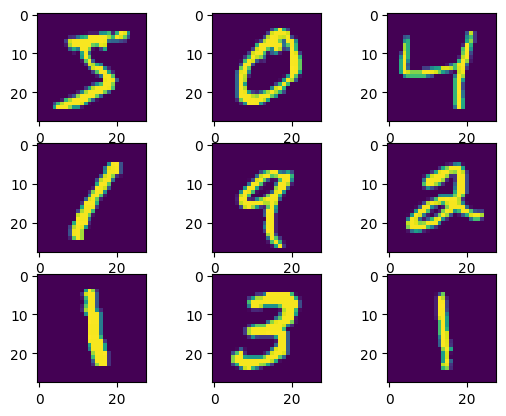

In [17]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

training_data = MNIST(root='./', train=True, download=False, transform=ToTensor())
test_data = MNIST(root='./', train=False, download=False, transform=ToTensor())

print(len(training_data))
print(len(test_data))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(training_data.data[i])
plt.show()

In [18]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    nn.Linear(784, 64),    # 28*28 이미지이므로 입력은 784
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [19]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [32]:
model.load_state_dict(torch.load('MNIST.pth', map_location=device))
num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data,(-1,784)).to(device)
        
        output = model(data.to(device))
        preds = output.data.max(1)[0]
        print(preds)

tensor([14.3268, 19.0907, 12.6185, 25.5504, 18.3502, 19.2734, 17.6529, 19.9357,
        17.1007, 19.6541, 27.8040, 20.2138, 26.6948, 26.1861, 17.3668, 15.3968,
        19.5344, 17.2433, 10.5241, 23.0924, 15.5562, 21.0915, 13.4852, 33.9869,
        16.8014, 27.7869, 19.2661, 27.8093, 29.6645, 11.7683, 24.4088, 11.4921],
       device='cuda:0')
tensor([22.0886, 18.2940, 20.5369, 20.0316, 15.9976, 14.8525,  4.4781, 15.0868,
        10.4966, 18.2913, 28.1750, 12.2681, 14.3920, 26.9614, 14.9634, 21.7638,
        25.1674, 15.9347, 14.8129, 22.5124, 26.8707, 17.7762, 16.0373, 18.7096,
        33.2119, 15.4012, 28.1837, 11.0323, 25.0825, 14.1415, 11.6259, 15.5981],
       device='cuda:0')
tensor([34.9635, 13.2163,  7.1948, 23.6502, 22.0978, 21.1881, 24.6730, 34.7477,
        16.8238, 15.8632, 13.5444, 24.9883, 18.4334, 12.8439, 12.5952, 22.6915,
        16.5645, 16.6436, 24.0587, 18.8033, 15.5265, 28.4323, 20.3324, 15.7161,
        24.9319, 16.2064, 18.1051, 20.7601, 13.6535, 21.4004, 17.4637,

tensor([30.5584, 18.5554, 15.6853, 20.6599, 13.8431, 11.5858, 21.7425, 18.9474,
        24.6206, 12.6096, 14.9824, 10.4877, 24.9887, 11.2189, 40.3579, 25.1489,
        14.6303, 26.7456, 29.5669, 14.9958, 17.3252, 28.1679, 24.7101, 32.6345,
        16.7320, 51.6602, 14.4155, 25.4445, 22.9368, 14.3736, 17.0288, 17.4112],
       device='cuda:0')
tensor([10.9771, 18.0944,  9.2511, 22.5281,  6.2901, 13.2502, 23.5276, 18.8942,
        11.4560, 14.9828, 22.4734, 25.4486, 21.3454, 12.8670, 28.8267, 24.4650,
        15.2472, 11.8724, 18.2804, 18.3872, 18.2510, 19.6330, 17.3088, 24.5061,
        25.0663, 20.3665, 18.5304, 11.8743, 27.9832, 18.1318, 16.4146, 12.5020],
       device='cuda:0')
tensor([26.9784, 19.3209, 21.1938, 12.0582,  5.5268, 27.7811, 33.7497, 10.7350,
        23.3992, 19.0370, 25.2779, 29.3912, 25.4946, 18.1884,  5.1920, 26.6316,
        27.8837, 16.8329, 24.5202, 19.7112, 26.8167,  9.8855, 24.8350, 19.1521,
        19.8367, 24.0650,  7.8454, 12.8907, 17.0737,  4.8033, 12.4349,

tensor([13.6754, 14.2711,  6.9080, 27.1584, 21.7322, 20.0241, 15.4572, 14.4554,
         7.4990, 11.2010, 20.5085, 10.5330,  8.5371, 10.7338, 21.5951, 35.4310,
        26.0258, 14.0002, 12.1237, 12.7846, 28.0821, 23.0211, 12.7562, 11.6067,
         7.7462, 15.1211, 28.7180, 10.2598,  7.5618, 30.0458, 24.5396, 22.3898],
       device='cuda:0')
tensor([30.0575, 11.4257, 13.9719, 13.7658,  8.0710, 20.4997, 20.0010, 18.7255,
        11.8649, 18.8251, 17.9885, 12.8095, 30.2008, 20.1043, 27.2940,  5.6634,
        20.6768, 17.4806, 15.8448, 18.4883, 18.6139, 23.9910,  7.6909, 11.9919,
        25.2408,  9.9348, 20.1325, 13.6700, 24.8024, 19.9363, 39.3902, 14.1433],
       device='cuda:0')
tensor([38.7329, 18.6056, 16.1486, 21.5105, 19.2645, 18.1065, 27.2806, 31.0970,
        25.7231, 23.4148, 13.0066, 26.2454, 27.2104,  5.9201, 25.2235, 17.0818,
        28.9311, 14.2717, 11.1528, 14.9080, 23.5950, 22.5016, 11.7384, 36.8713,
        13.8013, 17.7097, 30.9837,  4.5915, 27.6261,  4.2500, 17.5557,

tensor([23.5363, 31.5549, 11.0694, 25.7784, 11.8898,  5.1887, 10.1815, 17.4924,
        11.9165, 22.2232, 10.5447,  7.5173, 24.0777, 10.2448, 19.9428, 48.9455,
        27.7844, 24.3243, 18.7410, 27.8343, 12.7619, 28.2920, 17.5028, 16.7505,
        17.0606, 20.1852,  9.2043, 15.8862,  7.6412, 27.8827, 16.5702, 21.2925],
       device='cuda:0')
tensor([16.3652, 35.9226,  8.1464, 14.5898, 19.9093, 22.0029, 28.3920, 14.1904,
        27.7394, 21.7302, 11.5606, 23.9111, 14.9204, 23.7204, 22.9977,  8.3380,
        10.5136, 11.8099, 21.1084, 19.8999, 19.2323,  9.9836, 10.6418, 21.1257,
        12.6103, 22.5668, 22.4028, 14.0819, 16.9402, 27.2703, 11.7806, 10.0315],
       device='cuda:0')
tensor([17.8621, 25.7464, 20.4783, 21.1129, 18.0040, 10.2359, 31.5556, 16.4882,
        13.0769, 24.4333, 28.5335, 33.1832, 20.3408, 19.8121, 32.4998, 24.3408,
        19.9211, 13.3428,  8.2767, 17.3728, 28.4589, 13.1759, 23.9686, 14.9353,
        12.3765, 19.8635, 23.5619, 24.7362, 10.2648, 17.2774, 25.0752,

tensor([14.3472, 14.5769, 16.5065, 27.1172, 18.0020, 19.0866, 10.8566, 24.6213,
         3.3705, 11.2581, 18.8540, 25.3185, 31.2606, 17.7225, 28.1499, 15.5563,
        11.6599, 15.1126, 31.7938, 13.0925, 10.4457, 18.9437, 16.9333, 15.8661,
        22.8743, 15.1567, 11.4678, 15.1972, 28.4708, 19.2372, 19.4235, 27.5543],
       device='cuda:0')
tensor([14.4290, 26.6618, 21.1458, 25.4711, 18.4956, 12.6307, 13.6318,  4.8532,
        30.9201, 22.2379, 15.3475, 13.6978, 19.3947, 19.1508, 14.6513, 20.8384,
        19.9246, 10.6984,  9.5825, 12.9811, 18.2188, 17.0717, 22.5599, 25.6551,
        27.2506, 15.5723, 17.9440, 13.7636, 20.2207, 12.9380, 20.6718, 19.0231],
       device='cuda:0')
tensor([17.4879, 30.4473, 30.4206, 14.7570, 18.6740, 13.4473, 17.7858, 17.7158,
        26.8983, 11.0408, 28.2339, 23.6041, 18.8763, 18.6771, 26.5422, 15.8904,
        15.3288, 23.7579, 10.7874, 22.1358, 19.7978,  9.5087, 29.2054, 24.1217,
        19.9895, 16.1112, 10.6117, 15.0375, 20.6548, 19.0741, 20.2310,

tensor([16.2737, 17.6743, 15.0264, 15.8168, 17.2556, 20.4233, 21.3450, 17.0699,
        29.4403, 26.3814, 28.4639, 16.7595, 21.6186, 24.0291, 34.6545, 17.4490,
        34.9131, 11.4934, 25.8926, 19.8186, 24.4972, 30.3163, 20.1777, 19.8201,
        23.4765, 16.6156, 16.3402, 23.1398, 19.2297, 19.8159, 15.3202, 17.5245],
       device='cuda:0')
tensor([16.2405, 16.9528, 21.4427, 34.4649, 29.3185, 12.1297, 26.8242, 17.2430,
        16.1190, 18.6835, 21.9882, 22.8465, 17.3832, 32.3631, 21.9260, 15.5997,
        16.0659, 25.1500, 15.1064, 31.0667,  2.9713, 30.4714, 15.7443, 11.3647,
        20.5785, 15.5273, 20.9033, 29.9370, 16.5513, 31.0098, 41.2721, 17.0440],
       device='cuda:0')
tensor([26.0983, 22.8945, 19.0259, 18.7137, 15.2850, 21.2764, 30.8424, 16.1820,
        27.8924, 19.3699, 14.6690, 16.8862, 20.2572,  5.0719, 18.2190, 17.0747,
        30.5615, 27.2127, 27.4397, 24.8186, 16.8680, 19.5308, 15.6956, 27.2509,
        15.4331, 16.6868, 28.4950, 31.3896, 13.8905, 31.9976, 18.5910,

tensor([40.6629, 38.2888, 16.3196, 26.4386, 21.8293, 28.5888, 18.1781, 26.5883,
        34.4496, 38.3775, 47.3603, 27.3772, 24.8020, 19.8667, 30.6459, 36.8779,
        16.1626, 22.4856, 20.2454, 40.4510, 47.3061, 28.9808, 28.1441, 17.6819,
        31.3535, 34.0051, 16.8528, 26.6990, 17.3662, 36.7166, 41.7238, 26.8518],
       device='cuda:0')
tensor([20.9717, 19.4747, 26.9908, 33.1834, 17.1767, 28.5207, 23.9877, 23.3679,
        27.3533, 28.7758, 23.8200, 13.5156, 32.7529, 24.7022, 16.8625, 23.9611,
        18.3782, 21.8669, 26.3269, 38.9745, 26.6782, 29.0108, 29.4817, 17.0602,
        17.7939, 14.2727, 22.4024, 27.4658, 38.0774, 16.0104, 15.6108, 19.0259],
       device='cuda:0')
tensor([24.8374, 26.3750, 26.4298, 19.3977, 35.0400, 18.0594, 23.3779, 30.8640,
        19.7358, 22.6447, 26.2612, 30.0798, 22.6763, 23.9212, 18.8241, 17.9781,
        32.6446, 50.4440, 27.8894, 31.6733, 23.4421, 27.3632, 16.0280, 18.2737,
        32.1775, 34.4195, 24.6947, 21.6858, 39.1621, 32.2441, 42.9679,

tensor([18.2942,  7.6047, 24.8397, 37.6787, 17.5184, 24.6871, 24.6577, 25.0436,
        29.3467, 24.8724,  9.6880, 18.5206, 22.9892, 25.8286, 13.9383, 24.9190,
        23.0804, 20.3671, 20.6751, 19.6904, 28.3656, 44.1198, 23.5028, 18.5029,
        24.5383, 13.2293, 22.8853, 21.4602, 20.9516, 27.0059, 28.4016, 25.8766],
       device='cuda:0')
tensor([15.2914, 43.9155, 23.4761, 27.4370, 18.9642, 19.5218, 25.6991, 23.9026,
        24.7872, 30.5300, 19.9066, 28.6570, 23.7424, 19.6637, 19.6625, 48.9455,
        21.1541, 26.5701, 19.3863, 32.4452, 12.8427, 17.4958, 19.4649, 20.8756,
        12.6649, 11.1424, 17.8426, 30.6730, 15.9448, 16.0656, 29.8357, 22.5910],
       device='cuda:0')
tensor([24.1115, 18.6371, 30.2735, 16.1507, 22.1345, 21.1415, 17.4081, 24.2106,
        14.6687, 20.1788, 34.6074, 18.7132, 20.3583, 16.5875, 29.7377, 17.0066,
        27.3864, 19.9151, 30.4659, 17.3131, 14.4229, 30.5068,  9.3567, 15.7372,
        22.8389, 16.6316, 22.6094, 11.5676, 50.7463, 21.6517, 22.7679,

tensor([41.5682, 28.8404, 25.1752, 12.7137, 14.6693, 17.1654, 31.0892, 29.5920,
        17.7346, 23.5556,  7.8936, 27.2164, 11.2613, 36.8295, 23.7880, 31.0945,
        14.8526, 34.4601, 29.2157, 28.0659,  6.6316, 25.0242, 16.6719, 26.0561,
        28.6144, 32.7323, 32.3812, 23.3245, 21.4028, 23.5595, 15.5805, 28.2459],
       device='cuda:0')
tensor([28.2161, 27.2728, 33.3028, 32.7012, 32.3943, 23.4877, 34.7701, 32.9992,
        30.8743, 27.1836, 29.1885, 17.6159, 17.6733, 16.7938, 16.3415, 10.4168,
        17.7626, 33.9421, 16.8775, 38.9442, 21.0583, 34.7263, 43.0601, 28.6678,
        40.3753, 34.3265, 15.5625, 12.8953, 21.1594, 13.4458, 12.2310, 13.5120],
       device='cuda:0')
tensor([15.2989,  9.9401, 20.1962, 38.6243, 14.1320, 20.2575, 30.5296, 17.2143,
        44.2788, 18.2997, 19.8368, 11.2603, 18.5762, 31.9071, 10.5831, 25.5316,
        28.7871, 15.6622, 34.4444, 26.6055, 29.7569, 33.9219, 17.1133, 34.1400,
        13.6650, 46.9444, 15.9840,  7.8582, 17.9167, 22.9635,  9.9337,

tensor([13.6820, 17.3695, 22.6316, 31.3440, 28.3455, 28.6693, 22.5078, 13.6842,
        16.4999, 34.5302, 33.2530, 18.6383, 10.9656, 20.2045, 20.8597, 17.8143,
        30.6410, 24.3461, 20.4683, 21.7443, 20.0425, 16.7556, 15.5102, 27.4319,
        29.2522, 16.3433, 22.4306, 12.5393, 33.1106, 30.4928, 15.7371, 22.9860],
       device='cuda:0')
tensor([31.3389, 24.4083, 28.2052, 35.7555, 44.1618, 12.9940, 11.0904, 24.8684,
        31.9862, 45.9041, 31.0051, 30.4243, 22.0314, 29.7133, 26.4452,  6.5524,
        27.0796, 16.0791, 35.5857, 43.2858, 32.7292, 35.0995, 18.3941, 25.7099,
        34.2444, 13.5385, 25.7635, 39.0252, 32.7094, 25.9415, 34.7767, 32.9460],
       device='cuda:0')
tensor([19.7134, 26.8971, 14.6826, 31.2174, 17.5026, 18.2986, 29.2464, 32.7642,
        16.4213, 31.7457, 40.2285, 30.5610, 22.7494, 23.5332, 39.9506, 21.7291,
        31.8508, 26.4927, 36.2016, 16.5308, 37.2762, 43.0810, 16.7590, 34.2047,
        14.1710, 28.1152, 35.0407, 23.3180, 26.6065, 20.8245, 24.5593,

tensor([13.2844, 16.4304,  2.7281, 18.8418, 14.3975, 30.2162, 12.4301, 11.8655,
        14.2033, 20.6547, 38.1884, 11.7859, 19.4026, 19.2105, 19.3414, 28.8840,
        31.1576, 29.0436, 13.0569, 11.7123, 22.6820, 23.3282, 20.7043,  7.3494,
        15.4988, 17.2212, 16.5131, 14.1862, 15.0245, 22.7292, 12.6516,  8.5641],
       device='cuda:0')
tensor([ 9.6890, 19.5365, 10.2744, 11.0864,  9.9115,  4.9797, 13.9968, 17.7471,
        22.3708, 21.7928, 17.9010, 25.5115, 14.2814, 22.1241, 13.6165, 16.4226,
         4.1476,  9.3457, 13.4136, 17.3259, 22.5098, 24.9448,  8.9071, 22.1626,
        11.0502, 13.4565, 22.4643, 22.7828, 17.9868, 15.1449, 20.4549, 19.3926],
       device='cuda:0')
tensor([13.4000, 15.0302,  6.2681, 22.1257, 18.1666, 10.0501,  6.9019, 20.8083,
        23.2928, 10.4774, 24.6085, 15.7761, 15.7577, 22.0590, 14.7176, 14.2833,
        14.4972, 23.7376, 20.6559, 17.7162,  9.0059,  7.3608, 37.7869, 19.8434,
        11.8553, 21.4209, 11.8027, 27.5367, 19.3570, 22.6635, 19.6023,